# Arabic News Classification - 02

## Model Evaluations

The best performing models were found to be the Multinomial Naïve Bayes and Random Forest Classifier models judging from the confusion matrices produced in the [modeling notebook](./01_modeling.ipynb), but accuracy metrics for each of the simple models are obtained in this notebook and stored in a dataframe to be used for visualizations. Testing, training, and cross validation scores were obtained to judge shortcomings in bias/variance.

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from tools import misc
from tools import visualizations as vis

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [2]:
data = misc.load('raw_data/corpus_df.pkl')
data.head()

,cls,text
id,,
0,sports,أعلن المدرب النمسوي لبوروسيا دورتموند بيتر شتو...
1,sports,ذكرت وسائل الإعلام البلغارية الجمعة ان العداءة...
2,sports,برز اسم نجم مانشستر يونايتد رايان غيغز (36 عام...
3,sports,قال مدرب نادي انتر ميلان الإيطالي خوزيه موريني...
4,sports,بيتر تشيك: حارس مرمى تشيكي ولد في 20 مايو عام ...


In [3]:
X = data.text
y = data.cls

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=misc.TEST_SIZE, random_state=misc.SEED, )

In [4]:
# Load MultinomialNB, RandomForestClassifier, GradientBoostingClassifier, SVC
nb = misc.load('outputs/models/cv0.pkl')
rfc = misc.load('outputs/models/cv1.pkl')
gbc = misc.load('outputs/models/cv2.pkl')
svc = misc.load('outputs/models/cv3.pkl')

In [9]:
models = [nb, rfc, gbc, svc]
names = ['Naive Bayes', 'Random Forest', 'Gradient Boosting', 'Support Vector']

train_scores = []
cv_scores = []
test_scores = []

for i, model in enumerate(models):
    print(f'{names[i]} Classifier')
    print('-'*30)
    train_score = model.score(X_train, y_train)
    train_scores.append(train_score)
    print(f'\tTrain Score: {train_score:.3f}')
    
    test_score = model.score(X_test, y_test)
    test_scores.append(test_score)
    print(f'\tTest Score: {test_score:.3f}')
    
    cv_score = cross_val_score(model, X_train, y_train, n_jobs=4, verbose=1).mean()
    cv_scores.append(cv_score)
    print(f'\tCross Val Score: {cv_score:.3f}')
    print('-'*30)

Naive Bayes Classifier
------------------------------
	Train Score: 0.956
	Test Score: 0.956


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   36.6s finished


	Cross Val Score: 0.954
------------------------------
Random Forest Classifier
------------------------------
	Train Score: 0.992
	Test Score: 0.991


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:  2.0min finished


	Cross Val Score: 0.960
------------------------------
Gradient Boosting Classifier
------------------------------
	Train Score: 0.969
	Test Score: 0.968


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:  6.2min finished


	Cross Val Score: 0.958
------------------------------
Support Vector Classifier
------------------------------
	Train Score: 0.981
	Test Score: 0.982


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


	Cross Val Score: 0.952
------------------------------


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed: 10.2min finished


In [17]:
scores_df = pd.DataFrame(data={
    'Training': train_scores,
    'Cross Validation': cv_scores,
    'Testing': test_scores,
}, index=names)
misc.save(scores_df, 'outputs/evaluations/baseline_scores_df.pkl')

In [19]:
scores_df

,Training,Cross Validation,Testing
Naive Bayes,0.956044,0.953791,0.955604
Random Forest,0.991813,0.959670,0.991209
Gradient Boosting,0.968599,0.957555,0.968352
Support Vector,0.981484,0.952280,0.982198


## Baseline Evaluations

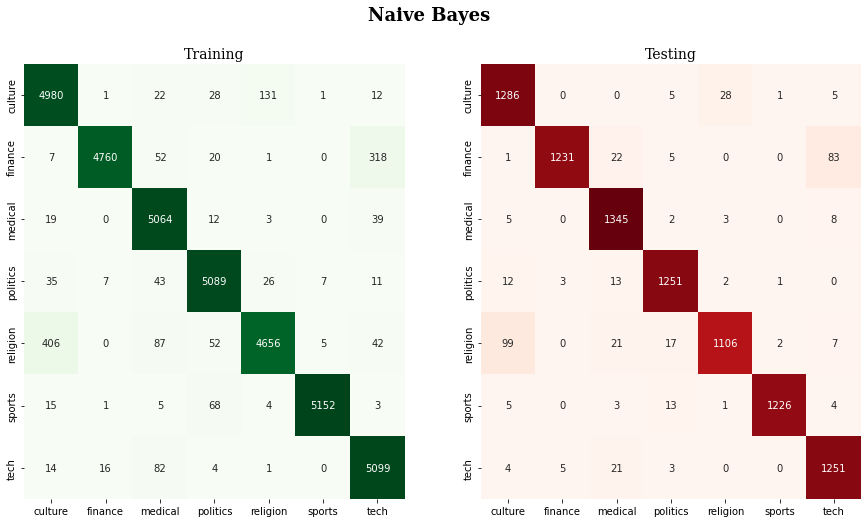

In [6]:
vis.plot_confusion_matrices(nb, X_train, X_test, y_train, y_test, save_path='images/nb_cm.png')

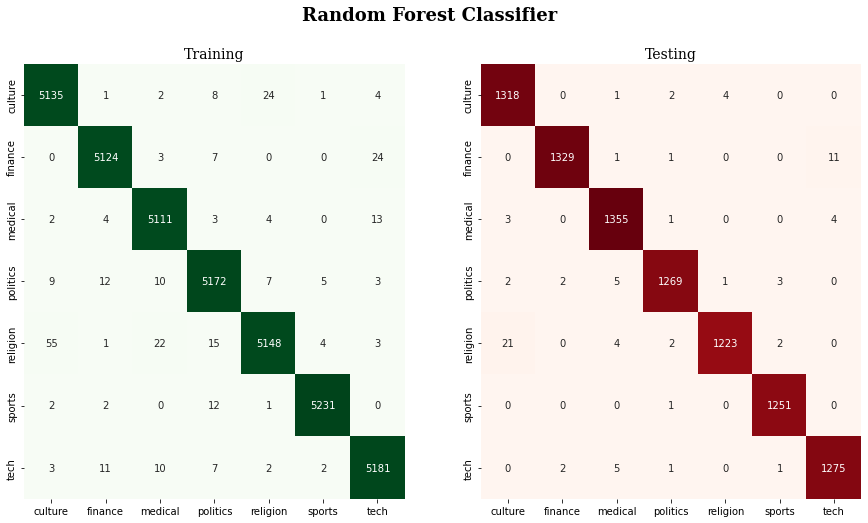

In [7]:
vis.plot_confusion_matrices(rfc, X_train, X_test, y_train, y_test, save_path='images/rfc_cm.png')

In [22]:
plt.savefig('images/rf_cm1.png', dpi=150)

<Figure size 432x288 with 0 Axes>